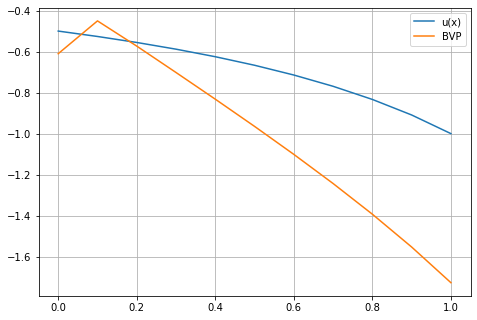

In [42]:
from matplotlib import pyplot as plt
from math import sin, atan, cos

N = 10
n = N + 1
h = 1 / N
x = [i * h for i in range(n)]

p = lambda x: 2 / (x - 2)
q = lambda x: x - 2
f = [1] * n
res = lambda x: 1 / (x - 2)

alpha0, alpha1 = 1, 1
beta0, beta1 = 0, 0
gamma0, gamma1 = -0.5, -1
'''
p = lambda x: (x + 1) ** 0.5
q = lambda x: 0.25
f = [(x_ + 1) ** 0.5 + x_ / 4 + 1.25 for x_ in x]
res = lambda x: 2 * (x + 1) ** 0.5 + x + 1

alpha0, alpha1 = 1, 1
beta0, beta1 = 0, 0
gamma0, gamma1 = 4, 2 * (2 ** 0.5 + 1)
'''

r = lambda x: p(x) * h / 2
#a = [(1 + abs(r(x_)) - r(x_)) / h**2 for x_ in x]
#c = [(1 + abs(r(x_)) + r(x_)) / h**2 for x_ in x]
a = [(1 + r(x_) * sin(r(x_)) - r(x_)) / h**2 for x_ in x]
c = [(1 + r(x_) * sin(r(x_)) + r(x_)) / h**2 for x_ in x]

a[0] = 0
c[N] = 0

#c[0] = 0 # beta0 = 0, also b[0] = ??(alpha0, gamma0)
#a[N] = 0

b = [q(x[i]) - a[i] - c[i] for i in range(n)]
b[0] = gamma0 * f[0] / alpha0
b[N] = gamma1 * f[N] / alpha1
'''
def solve(A, B, C, F, n, u0, uN):
    alpha, beta = [0] * n, [0] * n
    alpha[1] = -C[0] / B[0]
    beta[1]  =  F[0] / B[0]

    for k in range(1, n - 1):
        alpha[k + 1] = -C[k] / (B[k] + A[k] * alpha[k]) 
        
    for k in range(1, n - 1):
        beta[k + 1]  = (F[k] - A[k] * beta[k]) / (B[k] + A[k] * alpha[k])
        
    U = [0 for k in range(n)]
    U[N] = uN
    U[0] = u0
    #U[N] = (F[N] - A[N] * beta[N]) / (A[N] * alpha[N] + B[N])

    for k in range(n - 2, 1, -1):
        #print(alpha[k + 1], U[k + 1], beta[k + 1])
        U[k] = alpha[k + 1] * U[k + 1] + beta[k + 1]

    return U
'''
def solve(A, B, C, F, n, u0, uN):
    alpha, beta = [0] * n, [0] * n
    alpha[0] = -C[0] / B[0]
    beta[0]  =  F[0] / B[0]

    for k in range(1, n):
        alpha[k] = -C[k] / (B[k] + A[k] * alpha[k - 1]) 
        
    for k in range(n):
        beta[k]  = (F[k] - A[k] * beta[k - 1]) / (B[k] + A[k] * alpha[k - 1])
        
    U = [0 for k in range(n)]
    #U[N] = (beta[N] + alpha[N] * beta[N - 1]) / (1 - alpha[N] * alpha[N - 1])
    U[N] = uN
    U[0] = u0
    #U[N] = (F[N] - A[N] * beta[N]) / (A[N] * alpha[N] + B[N])

    for k in range(n - 2, 1, -1):
        #print(alpha[k + 1], U[k + 1], beta[k + 1])
        U[k] = alpha[k] * U[k + 1] + beta[k]
    angle = atan((uN - U[N - 1]) / h)
    
    def rotate(origin, point, angle):
        ox, oy = origin
        px, py = point

        qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
        qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
        return qy

    U = [rotate((U[N], x[N]) ,point, angle) for point in zip(x, U)]
    return U

u = solve(a, b, c, f, n, gamma0 / alpha0, gamma1 / alpha1)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, [res(x_) for x_ in x], label='u(x)')
ax.plot(x, u, label='BVP')
ax.legend()
plt.grid()
plt.show()